# Importando a base de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_json('Telco-Customer-Churn-limpeza.json')
data.head()

,customerID,Churn,Genero,MelhorIdade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,MultiplosTelefones,ServicoInternet,...,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,2.156712
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,1.969315
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,2.429589
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,3.221918
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2.758356


In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   Churn               7043 non-null   object 
 2   Genero              7043 non-null   object 
 3   MelhorIdade         7043 non-null   int64  
 4   Conjuge             7043 non-null   object 
 5   Dependentes         7043 non-null   object 
 6   MesesContrato       7043 non-null   int64  
 7   ServicoTelefonico   7043 non-null   object 
 8   MultiplosTelefones  7043 non-null   object 
 9   ServicoInternet     7043 non-null   object 
 10  SergurancaOnline    7043 non-null   object 
 11  BackupOnline        7043 non-null   object 
 12  ProtecaoDevice      7043 non-null   object 
 13  TechSupport         7043 non-null   object 
 14  StreamingTV         7043 non-null   object 
 15  StreamingMovies     7043 non-null   object 
 16  TipoCo

In [ ]:
#df.query('Churn == "Yes" and Genero == "Male"')

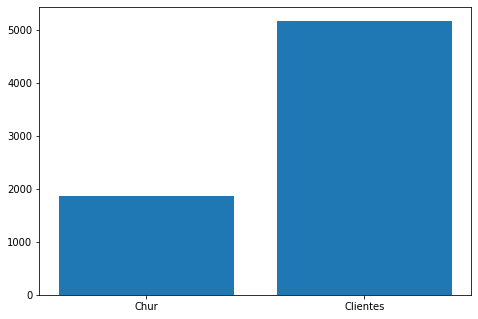

In [ ]:
#Neste primeiro gráfico consegui separar a quantidade de Churn para montar o gráfico

df_Chur_N = df['Churn'] == 'No' #Ou seja, é Cliente
df_Chur_Y = df['Churn'] == 'Yes' #Ou seja, é ex-cliente

qtd_Chur_N = len(df[df_Chur_N])
qtd_Chur_Y = len(df[df_Chur_Y])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Chur', 'Clientes']
quantidade = [qtd_Chur_Y,qtd_Chur_N]
ax.bar(labels,quantidade)
plt.show()

In [ ]:
df_Homens_Chur_N = len(df[(df.Churn == 'No') & (df.Genero == 'Male')])
df_Homens_Chur_Y = len(df[(df.Churn == 'Yes') & (df.Genero == 'Male')])
df_Mulheres_Chur_N = len(df[(df.Churn == 'No') & (df.Genero == 'Female')])
df_Mulheres_Chur_Y = len(df[(df.Churn == 'Yes') & (df.Genero == 'Female')])


# No gráfico acima não tinha separação de genero
# Para validar se estamos com todos os dados vamos alguns cálculos

Total_Homens = df_Homens_Chur_N + df_Homens_Chur_Y
Total_Mulheres = df_Mulheres_Chur_N + df_Mulheres_Chur_Y
Total_de_registros = Total_Homens + Total_Mulheres

print('Total de registros {}'.format(Total_de_registros))

Total de registros 7043


In [ ]:
# Conferindo se o número total de Churn está correto.
# Utilizando os dados separados no box acima

Total_Churn = df_Homens_Chur_Y + df_Mulheres_Chur_Y

print('O total do Churn é: {}'.format(Total_Churn))

O total do Churn é: 1869


In [ ]:
# Conferindo se o número total de clientes está correto.
# Utilizando os dados separados no box acima

Total_Clientes = df_Homens_Chur_N + df_Mulheres_Chur_N

print('O total de clientes é: {}'.format(Total_Clientes))

O total de clientes é: 5174


In [ ]:
# Verificando se o total de homens está correto

print('O total de homens é: {}'.format(Total_Homens))

O total de homens é: 3555


In [ ]:
# Verificando se o total de mulheres está correto

print('O total de mulheres é: {}'.format(Total_Mulheres))

O total de mulheres é: 3488


#Gráfico do Chur e Clientes por gênero

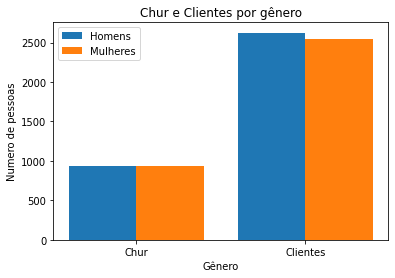

In [ ]:
# Utilizando o mesmo código para gerar o gráfico com variáveis com dado preenchidos de forma diferente

import numpy as np 

X = ['Chur','Clientes']
YHomens = [df_Homens_Chur_Y,df_Homens_Chur_N]
YMulheres = [df_Mulheres_Chur_Y,df_Mulheres_Chur_N]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, YHomens, 0.4, label = 'Homens')
plt.bar(X_axis + 0.2, YMulheres, 0.4, label = 'Mulheres')

plt.xticks(X_axis, X)
plt.xlabel("Gênero")
plt.ylabel("Numero de pessoas")
plt.title("Chur e Clientes por gênero")
plt.legend()
plt.show()

In [ ]:
# Analisar a variável target Churn com relação a outras variáveis

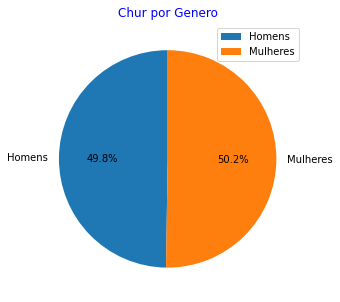

In [ ]:
labels_Genero = 'Homens', 'Mulheres'
sizes_Genero = [df_Homens_Chur_Y,df_Mulheres_Chur_Y]

plt.subplot()  
plt.pie(sizes_Genero, labels=labels_Genero, autopct='%1.1f%%', startangle=90)
plt.title("Chur por Genero", color='b')
plt.legend()

plt.show()

**Pensamento: O gráfico acima mostra que o genero não tem influência sobre a variável CHURN**

---

#Gráficos da Melhor Idade (Maior ou igual a 65 anos)

In [ ]:
# Preparando os dados para popular os gráfico
# Por se tratar de gráfico relacionados a melhor idade, 
# vou selecionar os dados apartir da coluna (variável 'MelhorIdade')

qtd_Churn_MI = len(df[(df.Churn == 'Yes') & (df.MelhorIdade == 1)])
qtd_Clientes_MI = len(df[(df.Churn == 'No') & (df.MelhorIdade == 1)])

print('Das pessoas classificadas como Melhor Idade temos: {} que são Churn e {} que ainda são clientes.'.format(qtd_Churn_MI,qtd_Clientes_MI))

Das pessoas classificadas como Melhor Idade temos: 476 que são Churn e 666 que ainda são clientes.


In [ ]:
# Vou fazer uma contra-prova com os que não são Melhor Idade para ver se os números batem

qtd_Churn_nao_MI = len(df[(df.Churn == 'Yes') & (df.MelhorIdade == 0)])
qtd_Clientes_nao_MI = len(df[(df.Churn == 'No') & (df.MelhorIdade == 0)])

print('Das pessoas que não são Melhor Idade temos: {} que são Churn e {} que ainda são clientes.'.format(qtd_Churn_nao_MI,qtd_Clientes_nao_MI))

Das pessoas que não são Melhor Idade temos: 1393 que são Churn e 4508 que ainda são clientes.


In [ ]:
# Vou fazer uma proporção para ver se quem é Melhor Idade tem mais probabilidade de Churn

total_MelhorIdade = qtd_Churn_MI + qtd_Clientes_MI
percentual_MelhorIdade = qtd_Churn_MI*100/total_MelhorIdade

print('Temos {}% de Churn no grupo da Melhor Idade'.format(round(percentual_MelhorIdade)))

total_nao_MelhorIdade = qtd_Churn_nao_MI + qtd_Clientes_nao_MI
percentual_nao_MelhorIdade = qtd_Churn_nao_MI*100/total_nao_MelhorIdade

print('E temos {}% de Churn no grupo que não é Melhor Idade'.format(round(percentual_nao_MelhorIdade)))

Temos 42% de Churn no grupo da Melhor Idade
E temos 24% de Churn no grupo que não é Melhor Idade


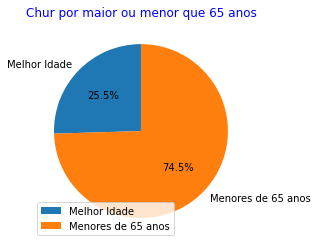

In [ ]:
# Revendo o código e a proposta do exercício, que é a variável CHURN, vou calcular abaixo o percentual de Melhor Idade dentro da variável CHURN

labels_MelhorIdade = 'Melhor Idade', 'Menores de 65 anos'
sizes_MelhorIdade = [qtd_Churn_MI,qtd_Churn_nao_MI]

plt.subplot()  
plt.pie(sizes_MelhorIdade, labels=labels_MelhorIdade, autopct='%1.1f%%', startangle=90)
plt.title("Chur por maior ou menor que 65 anos", color='b')
plt.legend()

plt.show()

**Pensamento: O gráfico acima mostra uma tendência maior das pessoas com mais de 65 anos sobre a variável CHURN**

---

##Gráfico do Chur na Melhor Idade (>= 65 anos)

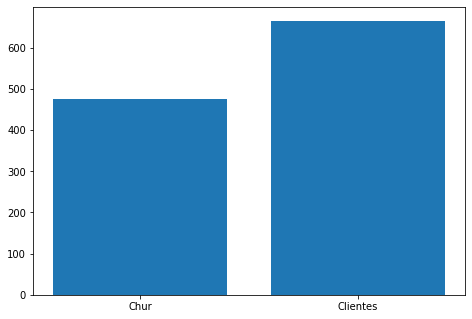

In [ ]:
# Criar gráfico para representação visual do Churn na Melhor Idade

fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
labels1 = ['Chur', 'Clientes']
quantidade1 = [qtd_Churn_MI,qtd_Clientes_MI]
ax1.bar(labels1,quantidade1)
plt.show()

##Gráfico do Chur maiores e menores que 65 anos

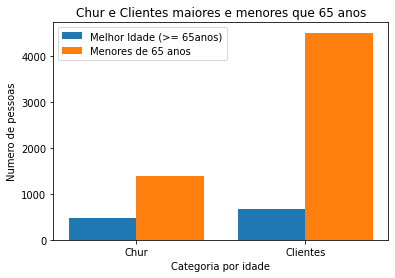

In [ ]:
X1 = ['Chur','Clientes']
YMelhorIdade = [qtd_Churn_MI,qtd_Clientes_MI]
YMenor65 = [qtd_Churn_nao_MI,qtd_Clientes_nao_MI]

X_axis1 = np.arange(len(X1))
  
plt.bar(X_axis1 - 0.2, YMelhorIdade, 0.4, label = 'Melhor Idade (>= 65anos)')
plt.bar(X_axis1 + 0.2, YMenor65, 0.4, label = 'Menores de 65 anos')

plt.xticks(X_axis1, X1)
plt.xlabel("Categoria por idade")
plt.ylabel("Numero de pessoas")
plt.title("Chur e Clientes maiores e menores que 65 anos")
plt.legend()
plt.show()

##Gráfico de pizza para facilitar a interpretação (Data Visualization)

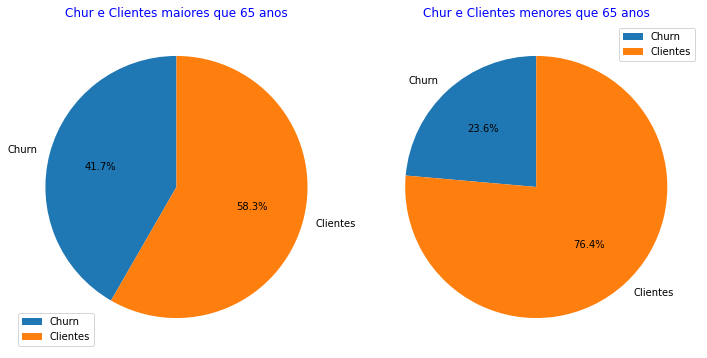

In [ ]:
labels = 'Churn', 'Clientes'
sizes_MI = [qtd_Churn_MI,qtd_Clientes_MI]
sizes_nao_MI = [qtd_Churn_nao_MI,qtd_Clientes_nao_MI]

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
plt.pie(sizes_MI, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Chur e Clientes maiores que 65 anos", color='b')
plt.legend()

plt.subplot(1,2,2)  
plt.pie(sizes_nao_MI, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Chur e Clientes menores que 65 anos", color='b')
plt.legend()

plt.tight_layout()

plt.show()

#Gráficos para buscar relação com o Churn

## Conjuges

In [ ]:
# Buscar o percentual de Churn que tem ou não conjuge
# Preparando os dados para popular os gráfico
# Por se tratar de gráfico relacionados a CONJUGE, vou selecionar os dados apartir da coluna (variável 'Conjuge')

qtd_Churn_Conjuge = len(df[(df.Churn == 'Yes') & (df.Conjuge == 'Yes')])
qtd_Clientes_Conjuge = len(df[(df.Churn == 'No') & (df.Conjuge == 'Yes')])

print('Das pessoas que TEM conjuge: {} pessoas cancelaram (Churn) e {} que ainda são clientes.'.format(qtd_Churn_Conjuge,qtd_Clientes_Conjuge))

qtd_Churn_sem_Conjuge = len(df[(df.Churn == 'Yes') & (df.Conjuge == 'No')])
qtd_Clientes_sem_Conjuge = len(df[(df.Churn == 'No') & (df.Conjuge == 'No')])

print('Das pessoas que NÃO TEM conjuge: {} pessoas cancelaram (Churn) e {} que ainda são clientes.'.format(qtd_Churn_sem_Conjuge,qtd_Clientes_sem_Conjuge))

Das pessoas que TEM conjuge: 669 pessoas cancelaram (Churn) e 2733 que ainda são clientes.
Das pessoas que NÃO TEM conjuge: 1200 pessoas cancelaram (Churn) e 2441 que ainda são clientes.


In [ ]:
#Olhando os números acima podemos identificar que há uma propabilidade maior de Churn em pessoas que NÃO TEM conjuge

total_conjuge = qtd_Churn_Conjuge + qtd_Clientes_Conjuge
percentual_conjuge = qtd_Churn_Conjuge*100/total_conjuge

print('Temos {}% de Churn que TEM conjuge'.format(round(percentual_conjuge)))

total_sem_conjuge = qtd_Churn_sem_Conjuge + qtd_Clientes_sem_Conjuge
percentual_sem_conjuge = qtd_Churn_sem_Conjuge*100/total_sem_conjuge

print('E temos {}% de Churn que NÃO TEM conjuge'.format(round(percentual_sem_conjuge)))



Temos 20% de Churn que TEM conjuge
E temos 33% de Churn que NÃO TEM conjuge


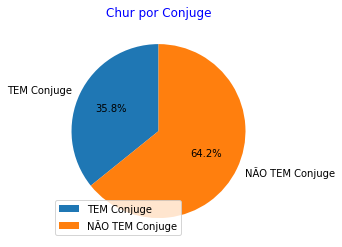

In [ ]:
labels_Conjuge = 'TEM Conjuge', 'NÃO TEM Conjuge'
sizes_Conjuge = [qtd_Churn_Conjuge,qtd_Churn_sem_Conjuge]

plt.subplot()  
plt.pie(sizes_Conjuge, labels=labels_Conjuge, autopct='%1.1f%%', startangle=90)
plt.title("Chur por Conjuge", color='b')
plt.legend()

plt.show()

**Pensamento: O gráfico acima mostra uma tendência das pessoas que NÃO TEM conjuge sobre a variável CHURN**

---